In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import glob
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
images=glob.glob('imagedata/1988/gen/*/*.png')
folder=glob.glob('imagedata/1988/gen/*')

In [24]:
pdfimages=glob.glob('imagedata/1988/pdf/*/*.png')

In [3]:
len(folder)

726

In [7]:
lbls=[]
ff=[]
fc=[]
for ele in images:
    posi=ele.rindex("/")
    lbls.append(ele[19:posi])
    posi2=ele[19:posi].index("_page")
    ff.append(ele[19:posi][:posi2])

In [25]:
lbls=[]
ff=[]
fc=[]
for ele in pdfimages:
    posi=ele.rindex("/")
    lbls.append(ele[19:posi])
    posi2=ele[19:posi].index("_page")
    ff.append(ele[19:posi][:posi2])

In [8]:
df = pd.DataFrame(dict(fname=images, label=lbls, fmtitle=ff))

In [26]:
df_pdf = pd.DataFrame(dict(fname=pdfimages, label=lbls, fmtitle=ff))

In [27]:
df_pdf.head(10)

,fname,label,fmtitle
0,imagedata/1988/pdf/f5713sc--1988_page_2/f5713s...,f5713sc--1988_page_2,f5713sc--1988
1,imagedata/1988/pdf/f706--1988_page_38/f706--19...,f706--1988_page_38,f706--1988
2,imagedata/1988/pdf/f8300--1988_page_2/f8300--1...,f8300--1988_page_2,f8300--1988
3,imagedata/1988/pdf/f6088--1988_page_1/f6088--1...,f6088--1988_page_1,f6088--1988
4,imagedata/1988/pdf/f8621--1988_page_2/f8621--1...,f8621--1988_page_2,f8621--1988
5,imagedata/1988/pdf/f1120fsc--1988_page_6/f1120...,f1120fsc--1988_page_6,f1120fsc--1988
6,imagedata/1988/pdf/f8716--1988_page_2/f8716--1...,f8716--1988_page_2,f8716--1988
7,imagedata/1988/pdf/f6088--1988_page_2/f6088--1...,f6088--1988_page_2,f6088--1988
8,imagedata/1988/pdf/f5713--1988_page_4/f5713--1...,f5713--1988_page_4,f5713--1988
9,imagedata/1988/pdf/f5500sc--1988_page_1/f5500s...,f5500sc--1988_page_1,f5500sc--1988


In [10]:
forms=df['fmtitle'].unique().tolist()
len(forms),len(df['label'].unique().tolist())

(149, 726)

In [2]:
images3=glob.glob('imagedata3/gen/*/*.png')
folder3=glob.glob('imagedata3/gen/*')

In [7]:
img_size = 448
bs = 64
data2 = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='label', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [11]:
img_size = 224
bs = 300
data = ImageDataBunch.from_df('.', df, fn_col='fname', label_col='label', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [12]:
learn2 = cnn_learner(data, models.resnet34, metrics=error_rate)
learn2.model=torch.nn.DataParallel(learn2.model)

In [14]:
learn2.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


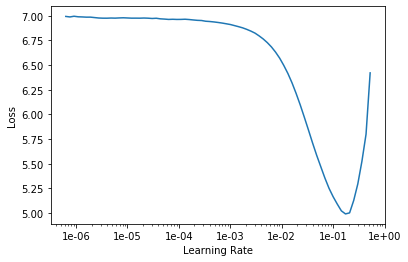

In [15]:
learn2.recorder.plot()

In [ ]:
learn2.fit_one_cycle(6, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.225601,0.190692,0.057071,03:48
1,0.241347,0.198072,0.055464,03:46
2,0.224742,0.186180,0.057208,03:51
3,0.203513,0.177009,0.052204,03:48
4,0.187585,0.166586,0.047704,03:48


In [23]:
learn2.fit_one_cycle(8, max_lr=0.005)

epoch,train_loss,valid_loss,error_rate,time
0,0.825047,0.444060,0.129991,41:50
1,1.201852,0.670823,0.165314,41:47
2,1.099141,0.578729,0.151782,41:43
3,0.980496,0.485298,0.135468,41:57
4,0.838052,0.430037,0.125761,42:13
5,0.704409,0.357645,0.115126,42:07
6,0.615148,0.299674,0.106143,42:12
7,0.566829,0.286938,0.104289,42:01


In [24]:
learn2.save("mdl_3k_448_10pt")

In [10]:
learn2.fit_one_cycle(1, max_lr=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.305691,0.222189,0.086902,10:59


In [11]:
learn2.fit_one_cycle(30, max_lr=0.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.287690,0.218781,0.087641,11:06
1,0.282672,0.219179,0.087917,11:02
2,0.288397,0.221979,0.087931,11:02
3,0.286908,0.225086,0.088264,11:03
4,0.292396,0.228932,0.088206,11:02
5,0.297543,0.234453,0.090380,11:02
6,0.293734,0.233360,0.091003,11:02
7,0.302504,0.238371,0.091249,11:02
8,0.300336,0.234656,0.090452,11:02
9,0.300365,0.235906,0.091350,11:01


In [18]:
learn2.unfreeze()
learn2.fit_one_cycle(4,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.183770,0.162294,0.047934,03:51
1,0.176353,0.163116,0.047612,03:50
2,0.175824,0.162228,0.049174,03:51
3,0.178624,0.160948,0.048623,03:50


In [51]:
learn2.unfreeze()
learn2.fit_one_cycle(6,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.230501,0.204192,0.081846,11:11
1,0.239689,0.207923,0.083454,11:11
2,0.242426,0.205518,0.081933,11:10
3,0.238825,0.205513,0.081542,11:07
4,0.232651,0.204580,0.081860,11:10
5,0.238101,0.204230,0.081918,11:11


In [52]:
learn2.save("mdl_3k_448_081pt")

In [34]:
learn2.data=data3

In [16]:
learn2.unfreeze()
learn2.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


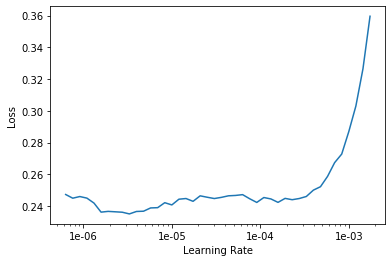

In [17]:
learn2.recorder.plot()

In [26]:
learn2.unfreeze()
learn2.fit_one_cycle(1,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.345900,0.224729,0.087018,23:25


In [37]:
learn2.unfreeze()
learn2.fit_one_cycle(12,max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.656346,0.341245,0.118560,11:07
1,0.519096,0.325008,0.113141,11:06
2,0.523603,0.342000,0.113503,11:09
3,0.498741,0.320192,0.109881,11:08
4,0.453207,0.301715,0.104680,11:09
5,0.419541,0.288786,0.101318,11:09
6,0.376786,0.270486,0.099276,11:10
7,0.336932,0.251266,0.094349,11:08
8,0.338661,0.241695,0.093321,11:08
9,0.321313,0.232033,0.092278,11:11


In [35]:

interp = ClassificationInterpretation.from_learner(learn2)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

NameError: name 'data' is not defined

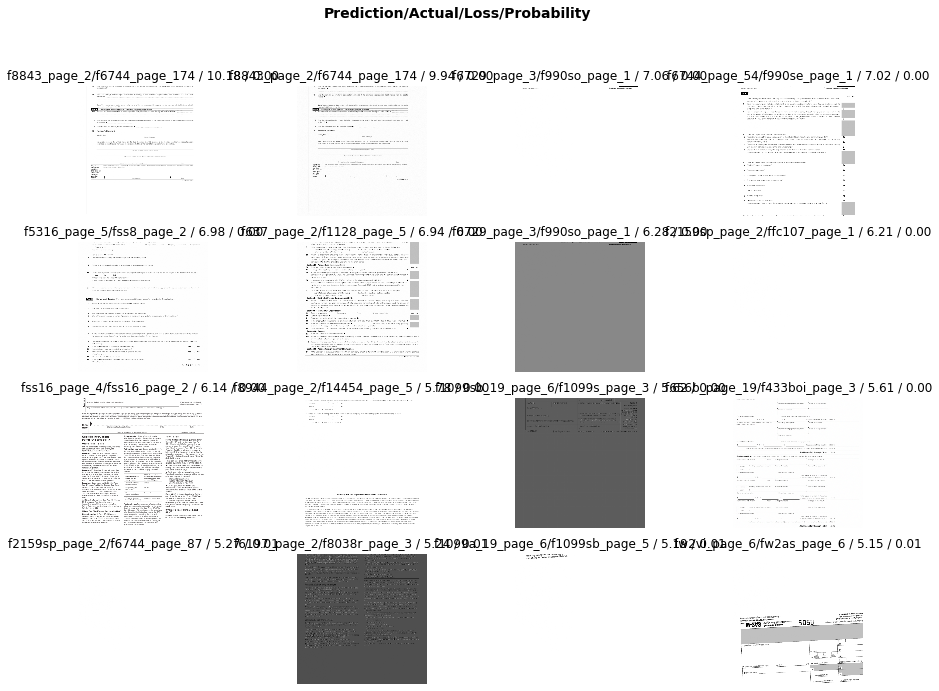

In [36]:
interp.plot_top_losses(16, figsize=(15,11))

In [40]:
list=interp.most_confused(min_val=2) 

In [42]:
eles=[]
for ele in list:
    eles.append({"classA":ele[0],"classB":ele[1],"errNo":ele[2]})

In [48]:
df_mis=pd.DataFrame(eles)

In [47]:
len(df.classB.unique().tolist())

230

In [49]:
df_mis.to_csv("most_confused.csv")

In [25]:
images_test=glob.glob('imagedata/pdf/*/*.png')

In [26]:
lbls=[]
ff=[]
fc=[]
for ele in images_test:
    posi=ele.rindex("/")
    lbls.append(ele[14:posi])
    posi2=ele[14:posi].index("_page")
    ff.append(ele[14:posi][:posi2])

In [28]:
df_tet = pd.DataFrame(dict(fname=images_test, label=lbls, fmtitle=ff))

In [29]:
df_tet.head(10)

,fname,label,fmtitle
0,imagedata/pdf/f8654_page_1/f8654_page_1.png,f8654_page_1,f8654
1,imagedata/pdf/f13614nr_page_2/f13614nr_page_2.png,f13614nr_page_2,f13614nr
2,imagedata/pdf/f1098q_page_3/f1098q_page_3.png,f1098q_page_3,f1098q
3,imagedata/pdf/f8891_page_2/f8891_page_2.png,f8891_page_2,f8891
4,imagedata/pdf/f6744_page_5/f6744_page_5.png,f6744_page_5,f6744
5,imagedata/pdf/f656b_page_5/f656b_page_5.png,f656b_page_5,f656b
6,imagedata/pdf/f6744_page_114/f6744_page_114.png,f6744_page_114,f6744
7,imagedata/pdf/f1042sq_page_1/f1042sq_page_1.png,f1042sq_page_1,f1042sq
8,imagedata/pdf/f1098e_19_page_5/f1098e_19_page_...,f1098e_19_page_5,f1098e_19
9,imagedata/pdf/f433dsp_page_2/f433dsp_page_2.png,f433dsp_page_2,f433dsp


In [143]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime


In [83]:
print("start ----->",datetime.datetime.now())
res=[]
for n_img in df_tet['fname']:
    _img=open_image(n_img)
    res.append(learn2.predict(_img)[0])
print("end ----->",datetime.datetime.now())

start -----> 2020-02-25 10:27:27.327885
end -----> 2020-02-25 10:31:04.998526


In [86]:
preds=[]
for ele in res:
    preds.append(ele.obj)

In [88]:
df_tet['pred']=preds

In [93]:
df_err=df_tet.loc[df_tet['label'] != df_tet['pred']]

In [126]:
len(df_err)

302

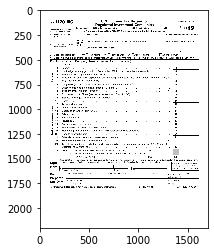

In [46]:
plt.imshow(mpimg.imread("imagedata/pdf/f1120ric_page_1/f1120ric_page_1.png"))

In [179]:
from ipywidgets import widgets
from IPython.display import display

In [211]:
out = widgets.Output()
label_dummy=widgets.Label(value="")
label_index=widgets.Label(value="Index #")
label_left=widgets.Label(value="left")
label_right=widgets.Label(value="right")
label_status=widgets.Label(value="status")
bnext=widgets.Button(description="next")
bprevious=widgets.Button(description="previous")
bmerge=widgets.Button(description="merge")
bdiscard=widgets.Button(description="dummy")
img_left=widgets.Image(
    value= open("imagedata/pdf/f1120ric_page_1/f1120ric_page_1.png", "rb").read(),
    format='png',
    width=320,
    height=500,
)
img_right=widgets.Image(
    value= open("imagedata/pdf/f1120ric_page_1/f1120ric_page_1.png", "rb").read(),
    format='png',
    width=320,
    height=500,
)
ctrlpanel=widgets.HBox(children=[label_dummy,bnext,bprevious,bmerge,bdiscard,label_index])
leftpanel=widgets.VBox(children=[label_left,img_left])
rightpanel=widgets.VBox(children=[label_right,img_right])
imagepanel=widgets.HBox(children=[leftpanel,rightpanel,label_status])
all_widgets=widgets.VBox(children=[ctrlpanel,imagepanel])
display(all_widgets)
label_data=[]
curr_index=-1
def drawData(df_data,index):
    img=[]
    title=[]
    leftn="imagedata/pdf/"+df_data['label'].values[index]+"/"+df_data['label'].values[index]+".png"
    #img.append(open_image(leftn))
    img_left.value= open(leftn,'rb').read()
    label_left.value=df_data['label'].values[index]
    rightn="imagedata/pdf/"+df_data['pred'].values[index]+"/"+df_data['pred'].values[index]+".png"
    img_right.value=open(rightn,'rb').read()
    #img.append(open_image(rightn))
    label_right.value=df_data['pred'].values[index]
    total=len(df_data)
    label_index.value=" Current Record Index:"+str(index) + "  total:"+str(total) +"          "
    label_status.value="Existing Label:"
    for ele in label_data:
        if(ele["index"]==curr_index):
            label_status.value="Existing Label:"+ele["status"]
def prev_click(ev):
    global curr_index
    curr_index=curr_index-1
    if(curr_index<0):
        curr_index=0
    drawData(df_err,curr_index)
def next_click(ev):
    global curr_index
    curr_index=1+curr_index
    drawData(df_err,curr_index)
def merge_click(ev):
    global curr_index
    label_data.append({"index":curr_index,"status":"merge"})
    for ele in label_data:
       # print(ele)
        if(ele["index"]==curr_index):
            label_status.value="Existing Label:"+ele["status"]
        else:
            label_status.value="Existing Label:"
def dummy_click(ev):
    global curr_index
    label_data.append({"index":curr_index,"status":"dummy"})
    for ele in label_data:
       # print(ele)
        if(ele["index"]==curr_index):
            label_status.value="Existing Label:"+ele["status"]
        else:
            label_status.value="Existing Label:"
bnext.on_click(next_click)
bmerge.on_click(merge_click)
bdiscard.on_click(dummy_click)
bprevious.on_click(prev_click)

IndexError: index 302 is out of bounds for axis 0 with size 302

IndexError: index 303 is out of bounds for axis 0 with size 302

IndexError: index 304 is out of bounds for axis 0 with size 302

In [233]:
vv=[]
for i in range(302):
    vv.append('merge')
for ele in label_data[:302]:
    vv[ele['index']]=ele['status']

In [238]:
df_err

,fname,label,fmtitle,pred,corr
8,imagedata/pdf/f1098e_19_page_5/f1098e_19_page_...,f1098e_19_page_5,f1098e_19,f1098e_page_5,merge
13,imagedata/pdf/f990sr_page_5/f990sr_page_5.png,f990sr_page_5,f990sr,f8082_page_2,merge
14,imagedata/pdf/f1096_page_1/f1096_page_1.png,f1096_page_1,f1096,f1096_19_page_1,dummy
15,imagedata/pdf/f14581g_page_1/f14581g_page_1.png,f14581g_page_1,f14581g,f14581c_page_1,merge
21,imagedata/pdf/f8928_page_1/f8928_page_1.png,f8928_page_1,f8928,f8831_page_1,dummy
...,...,...,...,...,...
3402,imagedata/pdf/f13614c_page_3/f13614c_page_3.png,f13614c_page_3,f13614c,f6744_page_91,merge
3406,imagedata/pdf/f990sc_page_4/f990sc_page_4.png,f990sc_page_4,f990sc,f990sm_page_2,merge
3420,imagedata/pdf/f1099r_18_page_9/f1099r_18_page_...,f1099r_18_page_9,f1099r_18,f1099r_page_9,merge
3439,imagedata/pdf/f2290sp_page_8/f2290sp_page_8.png,f2290sp_page_8,f2290sp,f2290sp_18_page_6,merge


In [236]:
df_err.to_csv("label_correction.csv")

In [240]:
trans_dict={}
for idx,row in df_err.iterrows():
    label=row['label']
    pred=row['pred']
    corr=row['corr']
    if(corr=="merge"):
        if(label in trans_dict.keys()):
            trans_dict[pred]=trans_dict[label]
        else:
            trans_dict[pred]=label
    elif(corr=="dummy"):
        trans_dict[label]="dummy"
        trans_dict[pred]="dummy"
        

In [241]:
trans_dict

{'f1098e_page_5': 'f1098e_19_page_5',
 'f8082_page_2': 'f990se_page_2',
 'f1096_page_1': 'dummy',
 'f1096_19_page_1': 'dummy',
 'f14581c_page_1': 'f14581f_page_1',
 'f8928_page_1': 'dummy',
 'f8831_page_1': 'dummy',
 'f1099k_page_6': 'f1099k_19_page_6',
 'f1099msc_19_page_1': 'dummy',
 'f5498_19_page_1': 'f1099s_page_1',
 'f8982_page_1': 'dummy',
 'f14242sp_page_1': 'dummy',
 'f656_page_7': 'f656b_page_28',
 'f14234_page_1': 'dummy',
 'f5884_page_1': 'dummy',
 'f8936_page_1': 'dummy',
 'f1099b_19_page_2': 'f1099b_page_2',
 'f1099k_19_page_1': 'dummy',
 'f1098e_19_page_1': 'dummy',
 'fss16_page_1': 'fss16_page_3',
 'f1040esn_page_10': 'dummy',
 'f1040esn_page_8': 'dummy',
 'fw2c_page_5': 'fw2c_page_4',
 'f5498qa_19_page_4': 'f5498qa_page_4',
 'f1099div_19_page_1': 'dummy',
 'f8805_page_2': 'f8805_page_4',
 'f433d_page_3': 'f433d_page_1',
 'fss16_page_3': 'fss16_page_3',
 'f1040es_page_10': 'dummy',
 'f1040es_page_12': 'dummy',
 'f1099qa_19_page_2': 'f1099qa_page_2',
 'f8986_page_1': 'du

In [244]:
def correctLabel(df_input,label,corr_dict):
    df_o=df_input.copy()
    df_o['corlabel']=df_o[label]
    for key in corr_dict.keys():
        df_o.loc[df_o[label]==key,'corlabel']=corr_dict[key]
    return df_o

In [245]:
df3_corr=correctLabel(df3,"label",trans_dict)

In [253]:
len(df3_corr.corlabel.unique().tolist())

3152

In [250]:
df3_corr.loc[df3_corr['corlabel']=='dummy']

,fname,label,fmtitle,corlabel
900,imagedata3/gen/f433dsp_page_2/f433dsp_page_2_1...,f433dsp_page_2,f433dsp,dummy
901,imagedata3/gen/f433dsp_page_2/f433dsp_page_2_8...,f433dsp_page_2,f433dsp,dummy
902,imagedata3/gen/f433dsp_page_2/f433dsp_page_2_3...,f433dsp_page_2,f433dsp,dummy
903,imagedata3/gen/f433dsp_page_2/f433dsp_page_2_1...,f433dsp_page_2,f433dsp,dummy
904,imagedata3/gen/f433dsp_page_2/f433dsp_page_2_5...,f433dsp_page_2,f433dsp,dummy
...,...,...,...,...
338095,imagedata3/gen/ffc105_page_1/ffc105_page_1_17.png,ffc105_page_1,ffc105,dummy
338096,imagedata3/gen/ffc105_page_1/ffc105_page_1_79.png,ffc105_page_1,ffc105,dummy
338097,imagedata3/gen/ffc105_page_1/ffc105_page_1_76.png,ffc105_page_1,ffc105,dummy
338098,imagedata3/gen/ffc105_page_1/ffc105_page_1_28.png,ffc105_page_1,ffc105,dummy


In [254]:
img_size = 224
bs = 300
data4 = ImageDataBunch.from_df('.', df3_corr, fn_col='fname', label_col='corlabel', \
                              ds_tfms=get_transforms(), size=img_size, bs=bs).normalize(imagenet_stats)

In [255]:
learn4 = cnn_learner(data4, models.resnet34, metrics=error_rate)
learn4.model=torch.nn.DataParallel(learn4.model)

In [258]:
learn4.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


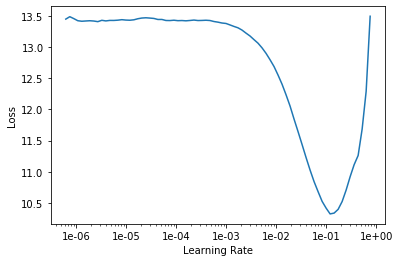

In [260]:
learn4.recorder.plot()

In [261]:
learn4.fit_one_cycle(36, max_lr=0.01)

epoch,train_loss,valid_loss,error_rate,time
0,0.258645,0.048068,0.015155,11:01
1,0.129382,0.045113,0.015170,11:02
2,0.140796,0.052987,0.017082,10:59
3,0.164542,0.064813,0.017604,11:06
4,0.208955,0.076335,0.020400,11:08
5,0.209903,0.086504,0.024037,11:04
6,0.213273,0.092779,0.024978,11:05
7,0.209644,0.093526,0.024631,11:05
8,0.194631,0.098897,0.023587,11:05
9,0.194077,0.083016,0.023689,11:02


In [262]:
learn4.unfreeze()
learn4.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


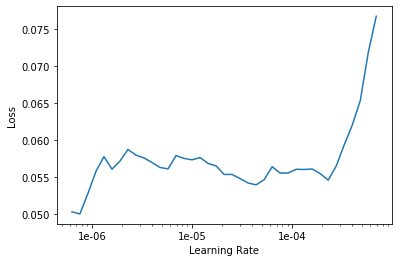

In [263]:
learn4.recorder.plot()

In [266]:
learn4.unfreeze()
learn4.fit_one_cycle(12,max_lr=slice(1e-6,5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.065389,0.029941,0.010779,11:11
1,0.060321,0.029906,0.010808,11:11
2,0.062004,0.030208,0.011127,11:10
3,0.066772,0.031089,0.011649,11:09
4,0.065344,0.030234,0.010982,11:09
5,0.063221,0.031168,0.011113,11:12
6,0.063467,0.030734,0.011562,11:11
7,0.063195,0.030435,0.011533,11:10
8,0.059130,0.030015,0.010779,11:08
9,0.061912,0.029497,0.010707,11:09


In [267]:
learn4.save("fed_merge_3k_99pt")

In [35]:
print("start ----->",datetime.datetime.now())
res_pdf=[]
for n_img in df_pdf['fname']:
    _img=open_image(n_img)
    res_pdf.append(learn2.predict(_img)[0])
print("end ----->",datetime.datetime.now())

start -----> 2020-02-27 21:51:46.400620
end -----> 2020-02-27 21:51:59.075457


In [36]:
vv=[]
for ele in res_pdf:
    vv.append(ele.obj)
df_pdf['pred']=vv

In [39]:
df_err=df_pdf.loc[df_pdf['label']!=df_pdf['pred']]
df_err.to_csv('1988_err.csv')

In [19]:
pngs = glob.glob('sd02/sd02/data/*/*/*.png')
pngs.extend(glob.glob('sd06/sd06/data/*/*/*.png'))
tags = [open(png[:-4] + '.fmt').readline().strip() for png in pngs]
len(pngs), len(tags)

(11185, 11185)

In [50]:
df_sd.label.unique().tolist()

['sch_e_1',
 'sch_c_2',
 'sch_b',
 '1040_1',
 'sch_c_1',
 '1040_2',
 '6251',
 'sch_d_1',
 'sch_d_2',
 'sch_a',
 '4562_2',
 'sch_se_2',
 '4562_1',
 'sch_e_2',
 'sch_f_1',
 'sch_se_1',
 'sch_f_2',
 '2106_2',
 '2106_1',
 '2441']

In [66]:
import datetime
print("start ----->",datetime.datetime.now())
res_sd=[]
for n_img in df_sd['fname']:
    _img=open_image(n_img)
    res_sd.append(learn2.predict(_img)[0])
print("end ----->",datetime.datetime.now())

start -----> 2020-02-27 23:39:56.536853
end -----> 2020-02-27 23:56:19.296197


In [85]:
df_1040=df_sd.loc[df_sd['label']=='sch_e_2'].copy()

In [67]:
vv=[]
for ele in res_sd:
    vv.append(ele.obj)
df_sd['pred']=vv

In [88]:
df_sd.loc[df_sd['label']=='4562_1']

,fname,label,pred
25,sd02/sd02/data/sfrs_0/r0063/r0063_07.png,4562_1,f4562--1988_page_1
71,sd02/sd02/data/sfrs_0/r0065/r0065_07.png,4562_1,f4562--1988_page_1
80,sd02/sd02/data/sfrs_0/r0001/r0001_06.png,4562_1,f4562--1988_page_1
123,sd02/sd02/data/sfrs_0/r0007/r0007_05.png,4562_1,f4562--1988_page_1
129,sd02/sd02/data/sfrs_0/r0050/r0050_05.png,4562_1,f4562--1988_page_1
...,...,...,...
11034,sd06/sd06/data/sfrs2_8/r0845/r0845_07.png,4562_1,f4562--1988_page_1
11084,sd06/sd06/data/sfrs2_8/r0818/r0818_05.png,4562_1,f4562--1988_page_1
11127,sd06/sd06/data/sfrs2_8/r0887/r0887_05.png,4562_1,f4562--1988_page_1
11131,sd06/sd06/data/sfrs2_8/r0862/r0862_06.png,4562_1,f4562--1988_page_1


In [ ]:
# now traing on 1988 forms
learn4.model

In [64]:
_img=open_image("sd02/sd02/data/sfrs_6/r0695/r0695_02.png")

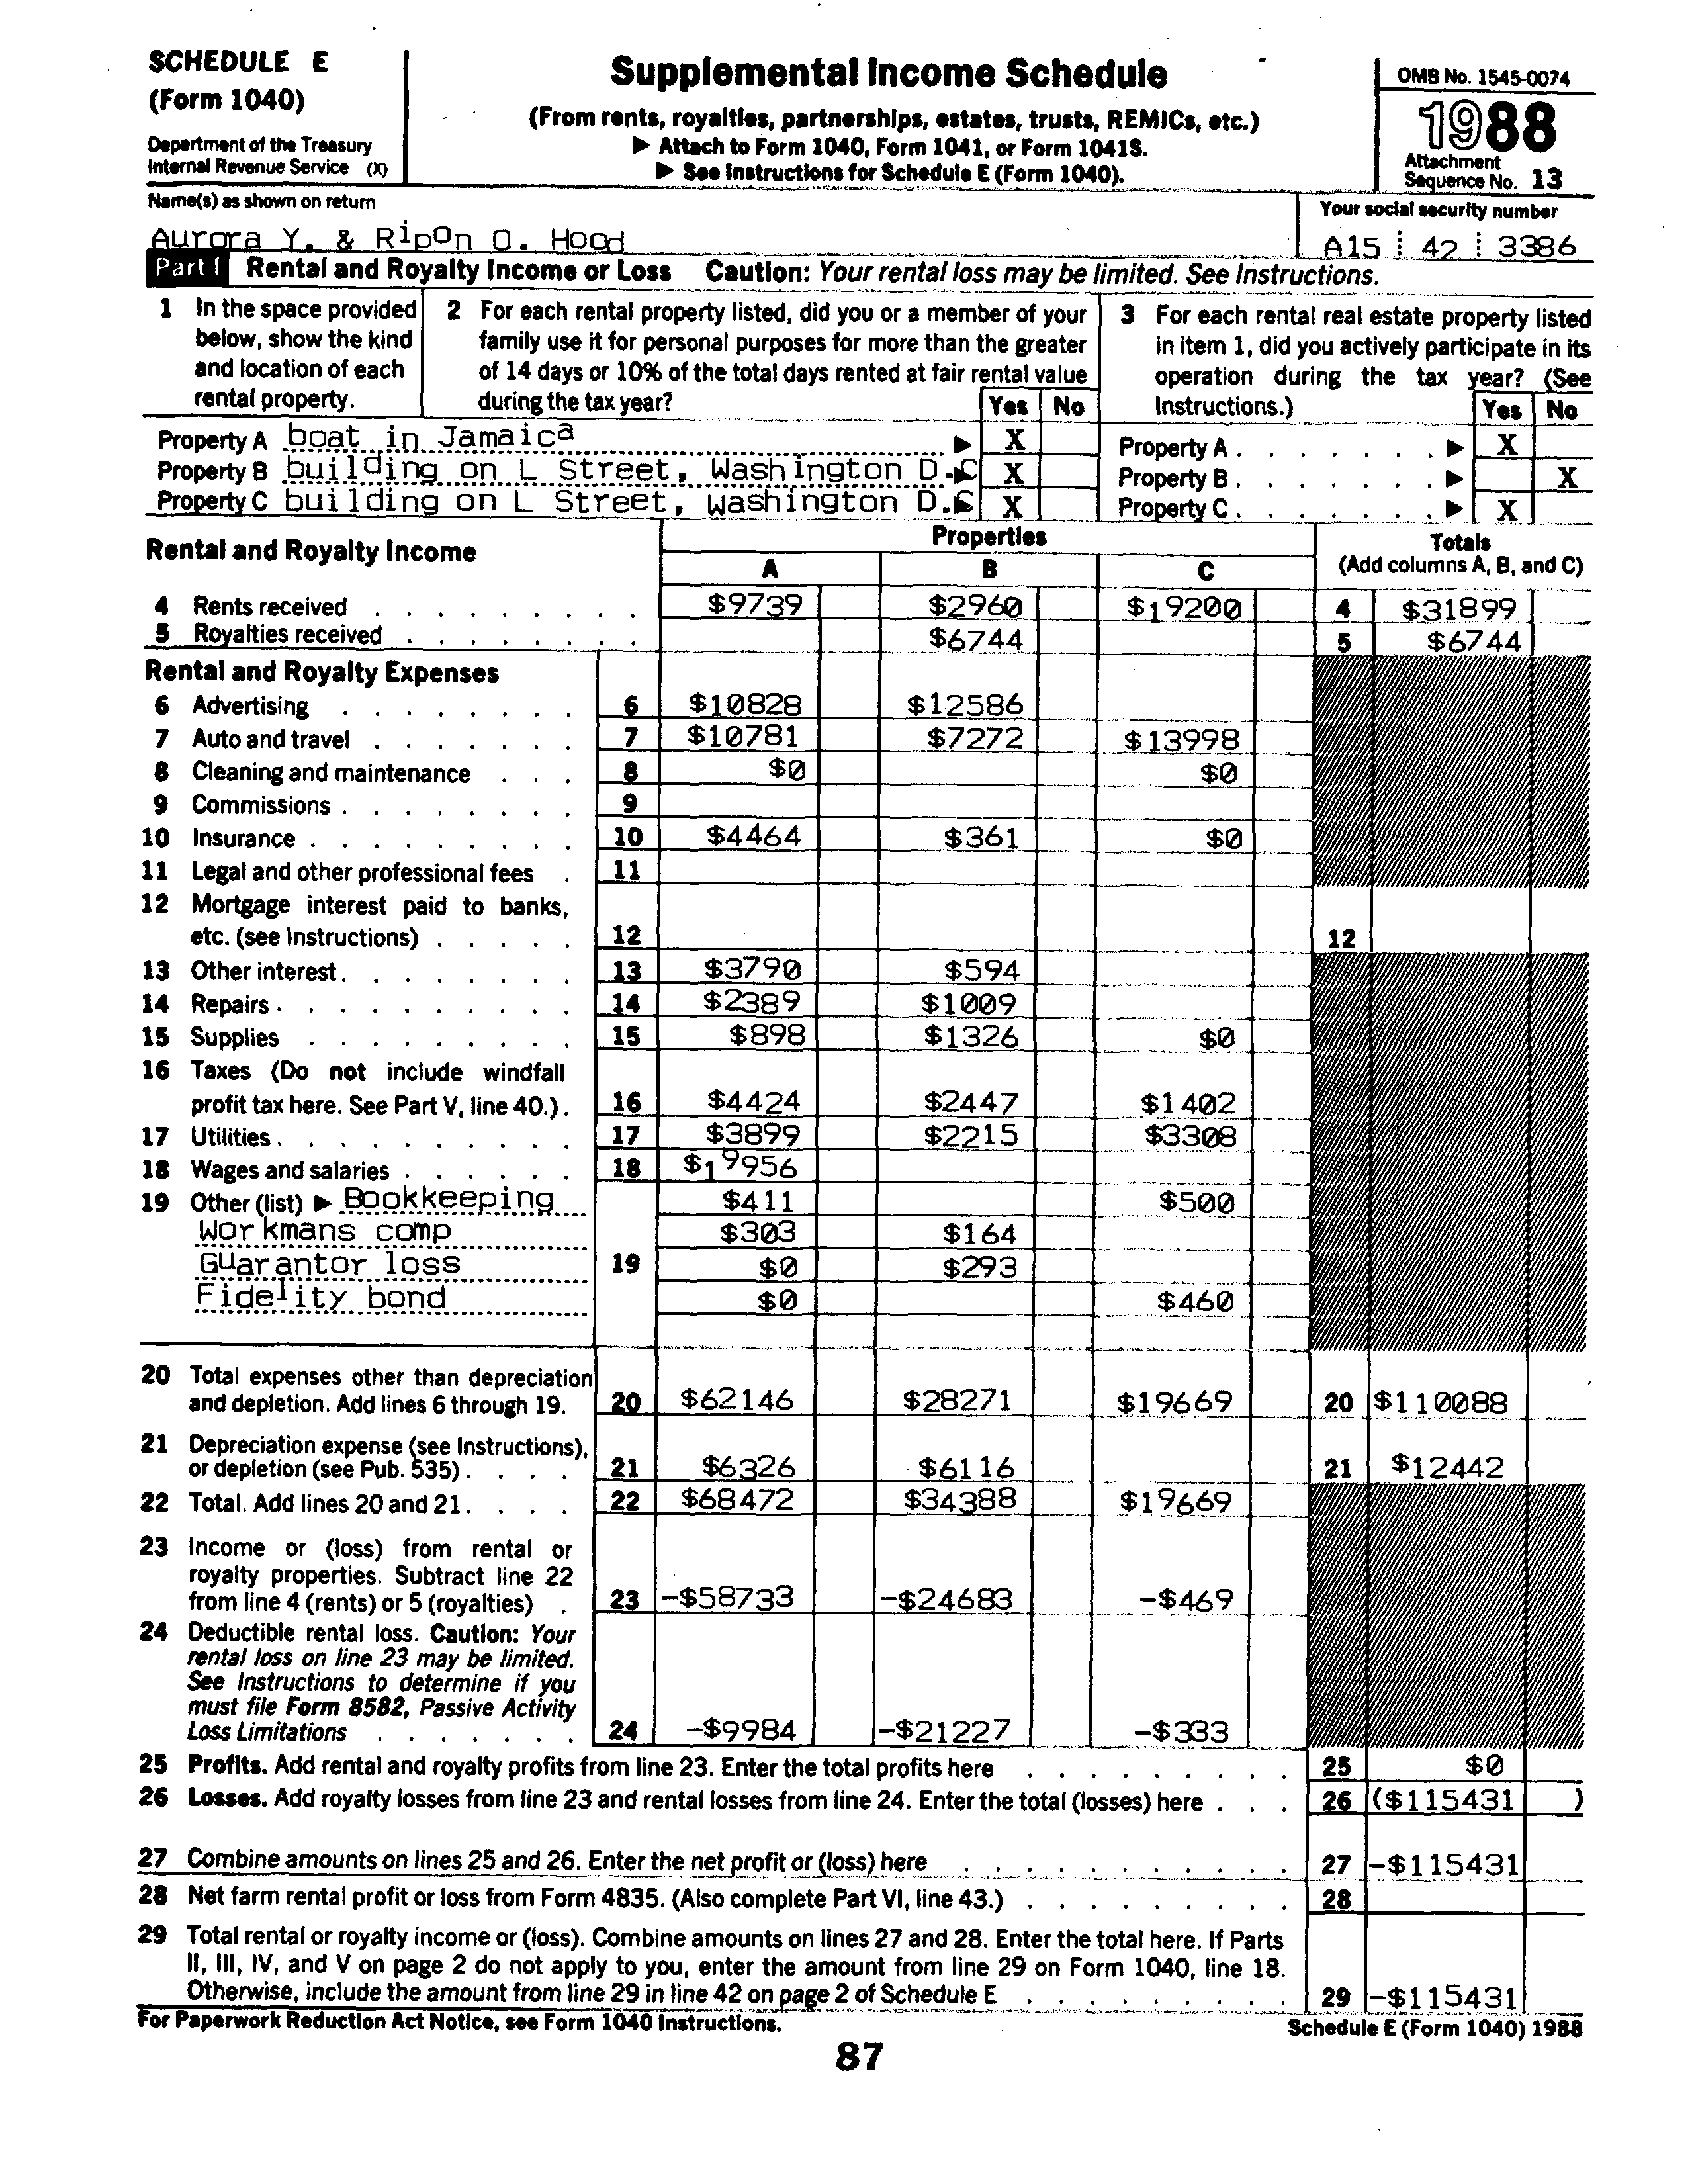

In [65]:
_img

In [89]:
labels=df_sd.label.unique().tolist()
ntotal=0
df_err=pd.DataFrame(columns=df_sd.columns)
for lbl in labels:
    df_tmp=df_sd.loc[df_sd['label']==lbl]
    pred_lbl=df_tmp['pred'].values[0]
    print(lbl,"--->",pred_lbl)
    if(len(df_tmp.loc[df_tmp['pred']!=pred_lbl])>0):
        df_err=df_err.append(df_tmp.loc[df_tmp['pred']!=pred_lbl])
        print(len(df_err))

sch_e_1 ---> f1040se--1988_page_1
41
sch_c_2 ---> f1040sc--1988_page_2
sch_b ---> f1040sab--1988_page_2
1040_1 ---> f1040--1988_page_1
sch_c_1 ---> f1040sc--1988_page_1
1040_2 ---> f1040--1988_page_2
6251 ---> f6251--1988_page_1
sch_d_1 ---> f1040sd--1988_page_1
42
sch_d_2 ---> f1040sd--1988_page_2
sch_a ---> f1040sab--1988_page_1
4562_2 ---> f4562--1988_page_2
sch_se_2 ---> f1040sse--1988_page_2
4562_1 ---> f4562--1988_page_1
sch_e_2 ---> f1040se--1988_page_2
sch_f_1 ---> f1040sf--1988_page_1
sch_se_1 ---> f1040sse--1988_page_1
sch_f_2 ---> f1040sf--1988_page_2
2106_2 ---> f2106--1988_page_2
2106_1 ---> f2106--1988_page_1
2441 ---> f2441--1988_page_1


In [91]:
len(df_err)/len(df_sd)

0.003755029056772463

In [92]:
df_err

,fname,label,pred
242,sd02/sd02/data/sfrs_0/r0033/r0033_03.png,sch_e_1,f1045--1988_page_2
1047,sd02/sd02/data/sfrs_6/r0672/r0672_06.png,sch_e_1,f1045--1988_page_2
1177,sd02/sd02/data/sfrs_6/r0695/r0695_02.png,sch_e_1,i706--1988_page_9
2728,sd02/sd02/data/sfrs_7/r0714/r0714_04.png,sch_e_1,f1045--1988_page_2
3911,sd02/sd02/data/sfrs_1/r0103/r0103_04.png,sch_e_1,f1045--1988_page_2
4599,sd02/sd02/data/sfrs_5/r0556/r0556_04.png,sch_e_1,f1045--1988_page_2
5778,sd06/sd06/data/sfrs2_4/r0441/r0441_04.png,sch_e_1,f1040sf--1988_page_1
5873,sd06/sd06/data/sfrs2_4/r0439/r0439_03.png,sch_e_1,f990t--1988_page_1
5926,sd06/sd06/data/sfrs2_4/r0414/r0414_04.png,sch_e_1,f1045--1988_page_2
6562,sd06/sd06/data/sfrs2_5/r0560/r0560_03.png,sch_e_1,f990t--1988_page_1
